### Hierarchial clustering on a real Dataset

In the second part of the <b>Hierarchial Clustering</b>, we are going to apply it to a real dataset called *Cars_clus.csv*.

In both examples, we will be using the **Agglomerative** method, which is a **bottom-up** technique for hierarchical clustering.

#### Load initial pachakges

In [96]:
import numpy as np 
import pandas as pd
import pylab
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm

### Read data

The feature sets include:
* price in thousands <b>(price)</b>
* engine size <b>(engine_s)</b>
* horsepower <b>(horsepow)</b>
* wheelbase <b>(wheelbas)<b/>
* width <b>(width)</b>
* length <b>(length)</b>
* curb weight <b>(curb_wgt)</b>
* fuel capacity <b>(fuel_cap)</b>
* fuel efficiency <b>(mpg)</b>

In [78]:
#Read csv
pdf = pd.read_csv("cars_clus.csv")
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### Data Cleaning

In this part we want to do the following steps:
1. Remove Every Null value within the dataset
2. Select Features to apply the clustering
3. Normalize the dataset

#### Removing Null values

In this part, we want to remove every sample which has a Null value even in one of its features.

In fact, in the dataset some features must have only numeric values; otherwise, we should drop remove them all.

In [79]:
print ("Shape of dataset before cleaning: ", pdf.shape)

numerical_features = [ 'sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']

pdf[numerical_features] = pdf[numerical_features].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.shape)

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


In [80]:
# add a new feature
# 1 mpg is 0.4251 km/l
pdf["kml"] = 0.4251 * pdf["mpg"]
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,11.9028
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,10.6275
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,9.3522
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,11.4777
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,9.3522


#### Feature Selection

In [81]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'kml']]

#### Normalization

Now we can normalize the feature set. MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [82]:
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.23333333]])

### Cluster the data Using scipy

First, we calculate the distance matrix.

In [83]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print (dist_matrix.shape)
print(dist_matrix)

(117, 117)
[[0.         0.58636151 0.78061301 ... 0.2872436  0.25793669 0.20022454]
 [0.58636151 0.         0.24895613 ... 0.36698373 0.6643036  0.62290533]
 [0.78061301 0.24895613 0.         ... 0.54346496 0.82865814 0.79062515]
 ...
 [0.2872436  0.36698373 0.54346496 ... 0.         0.41930631 0.35875684]
 [0.25793669 0.6643036  0.82865814 ... 0.41930631 0.         0.15212198]
 [0.20022454 0.62290533 0.79062515 ... 0.35875684 0.15212198 0.        ]]


In <b>agglomerative clustering</b>, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest.
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
- <i>single</i>
- <i>complete</i>
- <i>average</i>
- <i>weighted</i>
- <i>centroid</i>

We use **complete** for our case, but feel free to change it to see how the results change.

C:\Users\ramin\AppData\Local\Temp\ipykernel_1304\770258242.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


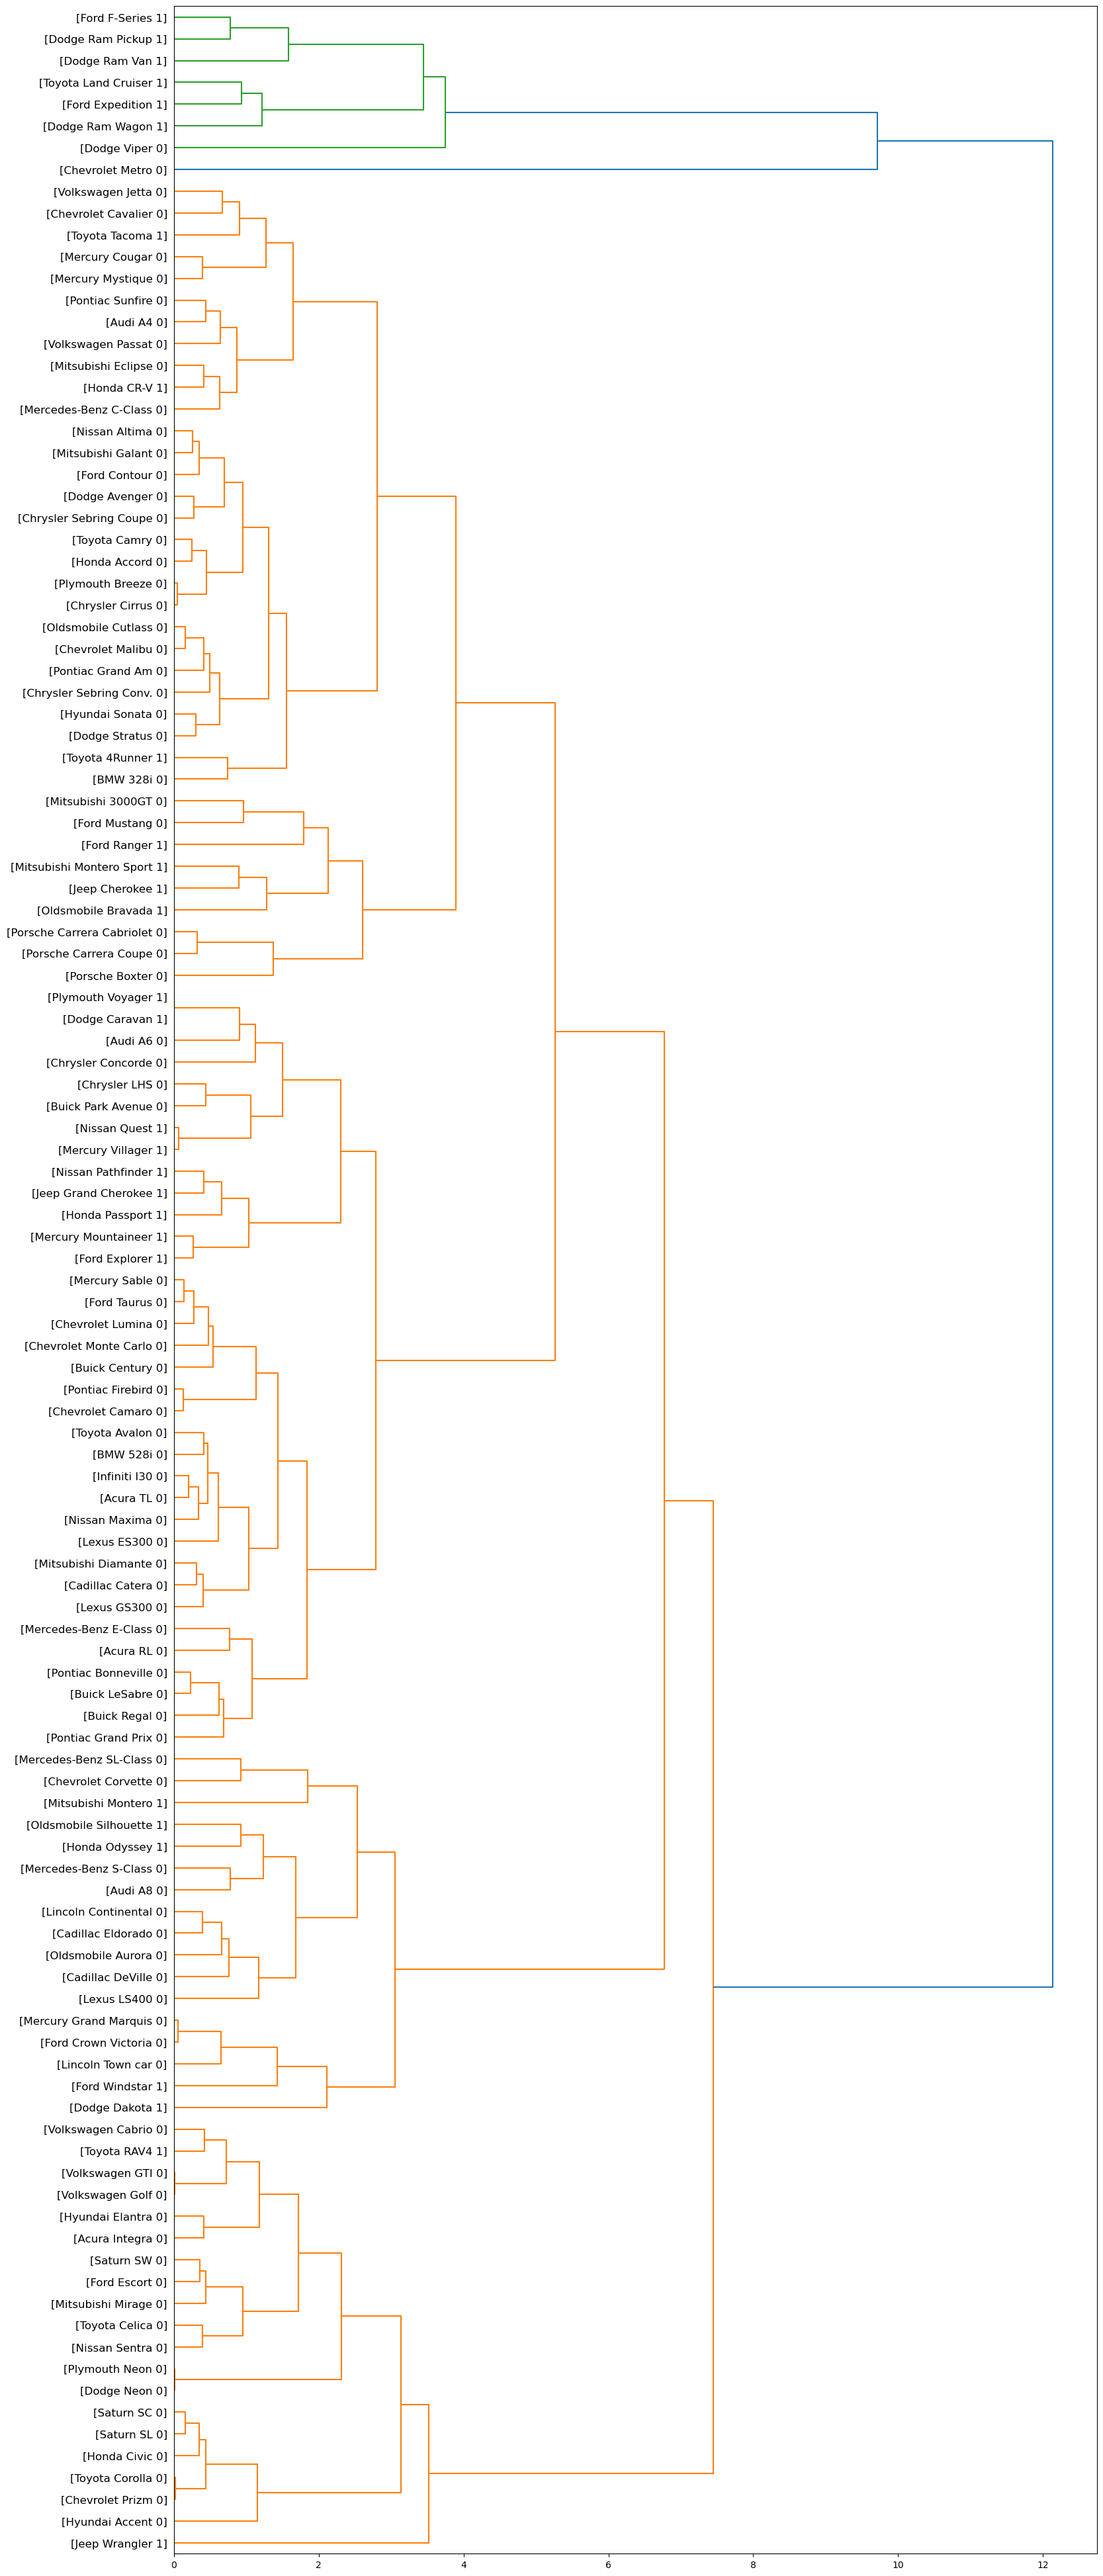

In [90]:
# Creat dendrogram
Z = hierarchy.linkage(dist_matrix, 'complete')

# Plot the dendrogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Agglomerative Clustering

The linkage criterion determines which distance to use between sets of observations. The algorithm will merge the pairs of clusters that minimize this criterion

*Note: There are other options for <b>linkage</b>:*
* <b>Single</b>: uses the <b>minimum</b> of the distances between all observations of the two sets
* <b>Complete</b>: uses the <b>maximum</b> of the distances between all observations of the two sets
* <b>Average</b>: uses the <b>average</b> of the distances of each observation of the two sets
* <b>Ward</b>: <b>minimizes the variance</b> of the clusters being merged

In [95]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Now fit the algorithm to the dataset
agglom.fit(dist_matrix)

# Add a new feature to the DataFrame
pdf['cluster_no'] = agglom.labels_
pdf.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:585: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,cluster_no
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,11.9028,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,10.6275,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,9.3522,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,11.4777,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,9.3522,2


C:\Users\ramin\AppData\Local\Temp\ipykernel_1304\2512494439.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'kml')

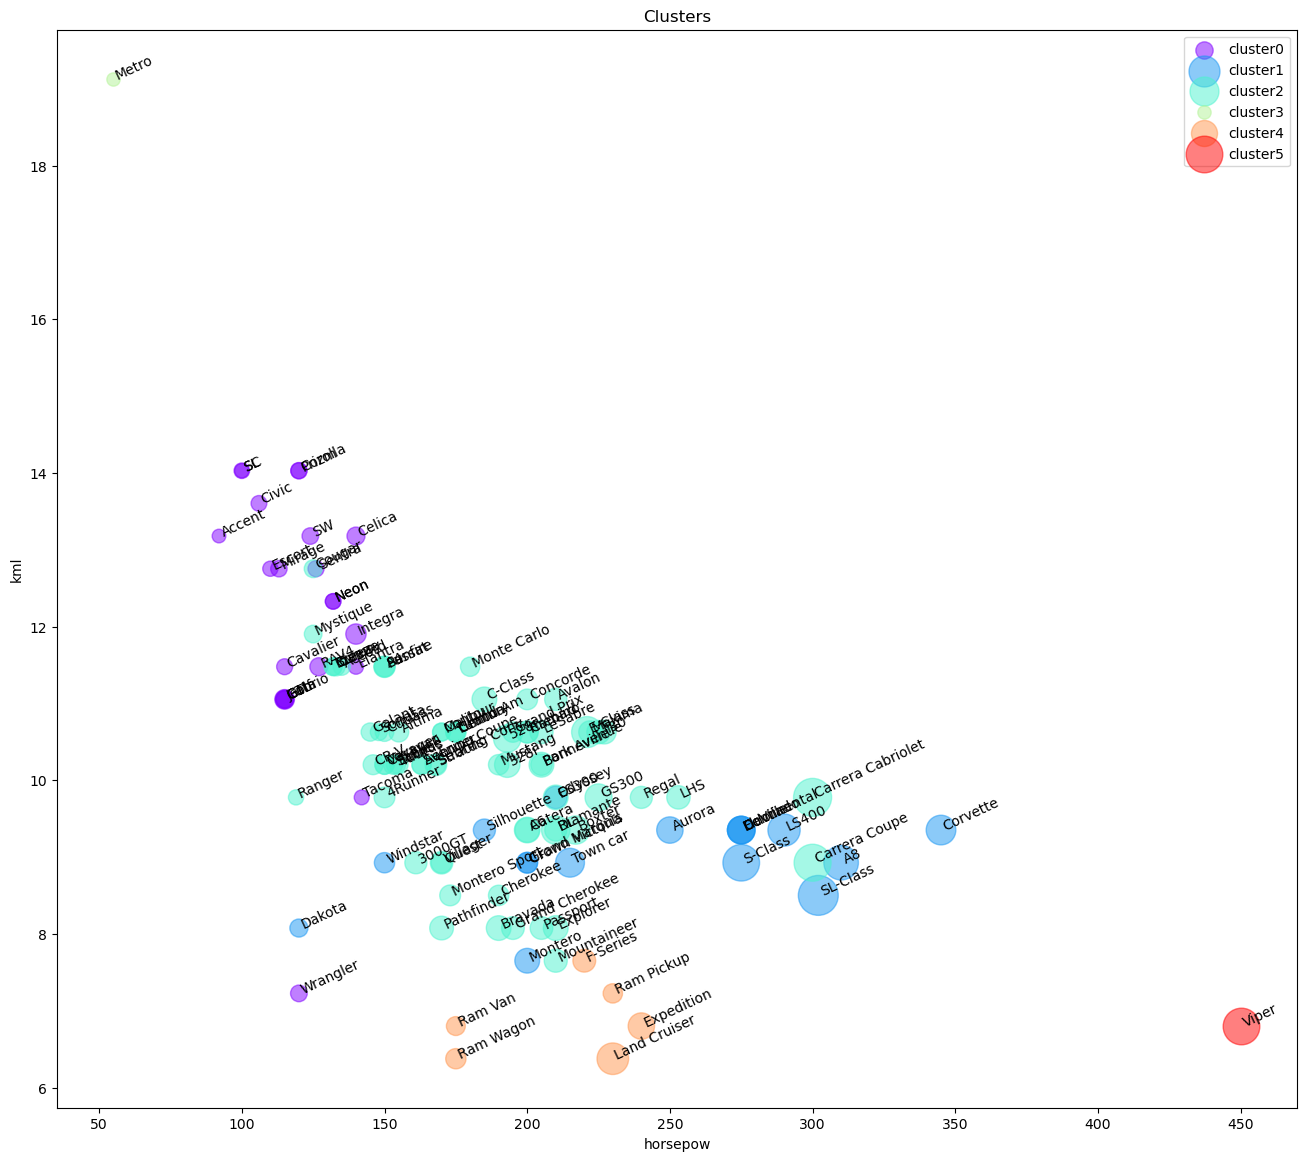

In [97]:
# Plot the data after clustering

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure
plt.figure(figsize=(16,14))

# select each cluster's samples
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_no == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.kml[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.kml, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('kml')

There are 2 types of vehicles in our dataset, **"truck"** (value of **1** in the **type** column) and **"car"** (value of **0** in the **type** column). So, we use them to distinguish the classes, and summarize the cluster. 

First we count the number of cases in each group:

In [102]:
pdf.groupby(by=['cluster_no','type'])['cluster_no'].count()

cluster_no  type
0           0.0     20
            1.0      3
1           0.0     12
            1.0      5
2           0.0     54
            1.0     15
3           0.0      1
4           1.0      6
5           0.0      1
Name: cluster_no, dtype: int64

In [116]:
agg_cars = pdf.groupby(by=['cluster_no','type'])[['horsepow','engine_s','kml','price']].mean()
agg_cars

horsepow  engine_s        kml      price
cluster_no type                                            
0          0.0   118.500000  1.890000  12.561705  14.226100
           1.0   129.666667  2.300000   9.493900  14.292000
1          0.0   267.666667  4.566667   9.104225  46.417417
           1.0   173.000000  3.180000   8.757060  24.308400
2          0.0   185.203704  2.907407  10.492098  26.280222
           1.0   173.200000  3.226667   8.870420  24.016067
3          0.0    55.000000  1.000000  19.129500   9.235000
4          1.0   211.666667  4.483333   6.872450  29.024667
5          0.0   450.000000  8.000000   6.801600  69.725000

It is obvious that we have 3 main clusters with the majority of vehicles in those.

**Cars**:

*   Cluster 1: with almost high kml, and low in horsepower.

*   Cluster 2: with good kml and horsepower, but higher price than average.

*   Cluster 3: with low kml, high horsepower, highest price.

**Trucks**:

*   Cluster 1: with almost highest kml among trucks, and lowest in horsepower and price.
*   Cluster 2: with almost low kml and medium horsepower, but higher price than average.
*   Cluster 3: with good kml and horsepower, low price.

Please notice that we did not use **type**  and **price** of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy.


C:\Users\ramin\AppData\Local\Temp\ipykernel_1304\3293257899.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
C:\Users\ramin\AppData\Local\Temp\ipykernel_1304\3293257899.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'kml')

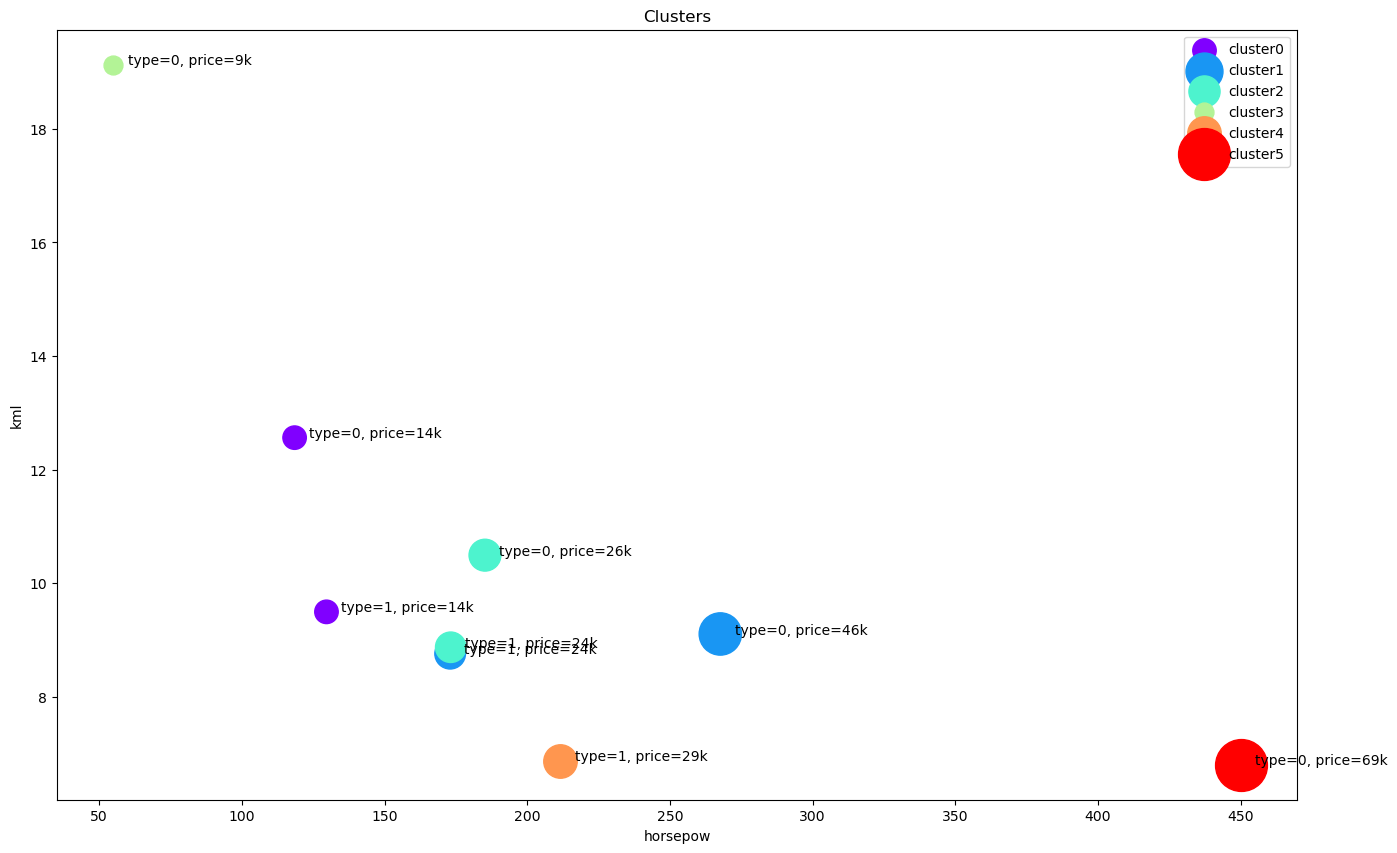

In [117]:
# Plot the cluster data means

plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('kml')